In [5]:
import pandas as pd
from PIL import Image
from skimage.transform import resize
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import seaborn as sns
import keras

In [15]:
# weather mapping function
def weatherName(i):
    if (i == 0):
        return "berembun"
    elif (i == 1):
        return "berkabut"
    elif (i == 2):
        return "hujan es"
    elif (i == 3):
        return "petir"
    elif (i == 4):
        return "hujan"
    elif (i == 5):
        return "pelangi"
    elif (i == 6):
        return "badai pasir"
    else:
        return "salju"

# weather code mapping function for data training
def weatherTrain(i):
    if (i < 200):
        return 0
    elif (i < 400):
        return 1
    elif (i < 600):
        return 2
    elif (i < 800):
        return 3
    elif (i < 1000):
        return 4
    elif (i < 1200):
        return 5
    elif (i < 1400):
        return 6
    else:
        return 7

# mapping for data training results (y_train)
y_train = np.array([weatherTrain(index) for index in range(0, 1600)], dtype=int)
y_train.reshape(-1,)
print(y_train.shape, y_train)


(1600,) [0 0 0 ... 7 7 7]


In [16]:
# data image preprocessing
# input training dataset to numpy array
dew = np.array([resize(np.array(Image.open('./Train/dew/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/dew')], dtype=float)

fogsmog = np.array([resize(np.array(Image.open('./Train/fogsmog/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/fogsmog')], dtype=float)

join = np.append(dew, fogsmog,  0)

hail = np.array([resize(np.array(Image.open('./Train/hail/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/hail')], dtype=float)

join = np.append(join, hail,  0)

lightning = np.array([resize(np.array(Image.open('./Train/lightning/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/lightning')], dtype=float)

join = np.append(join, lightning,  0)

rain = np.array([resize(np.array(Image.open('./Train/rain/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/rain')], dtype=float)

join = np.append(join, rain,  0)

rainbow = np.array([resize(np.array(Image.open('./Train/rainbow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/rainbow')], dtype=float)

join = np.append(join, rainbow,  0)

sandstorm = np.array([resize(np.array(Image.open('./Train/sandstorm/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/sandstorm')], dtype=float)

join = np.append(join, sandstorm,  0)

snow = np.array([resize(np.array(Image.open('./Train/snow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/snow')], dtype=float)

# X_train result
X_train = np.append(join, snow,  0)

# check data training shape
print(X_train.shape, y_train.shape)

(1600, 150, 200, 3) (1600,)


In [22]:
# cnn model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),  
    layers.Dense(512, activation='relu'),
    layers.Dense(8, activation='softmax')
])


# using adam for optimizer function and sparse categorical crossentropy for loss function 
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
              
# using 20 epochs
history = cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
50/50 [==============================] - 22s 427ms/step - loss: 1.7053 - accuracy: 0.3669
Epoch 2/20
50/50 [==============================] - 21s 422ms/step - loss: 1.1742 - accuracy: 0.5944
Epoch 3/20
50/50 [==============================] - 21s 419ms/step - loss: 0.9849 - accuracy: 0.6669
Epoch 4/20
50/50 [==============================] - 20s 394ms/step - loss: 0.8844 - accuracy: 0.7025
Epoch 5/20
50/50 [==============================] - 21s 418ms/step - loss: 0.7580 - accuracy: 0.7431
Epoch 6/20
50/50 [==============================] - 21s 417ms/step - loss: 0.7032 - accuracy: 0.7725
Epoch 7/20
50/50 [==============================] - 21s 416ms/step - loss: 0.6486 - accuracy: 0.7750
Epoch 8/20
50/50 [==============================] - 21s 414ms/step - loss: 0.5623 - accuracy: 0.8031
Epoch 9/20
50/50 [==============================] - 21s 415ms/step - loss: 0.5252 - accuracy: 0.8288
Epoch 10/20
50/50 [==============================] - 21s 414ms/step - loss: 0.4776 - accura

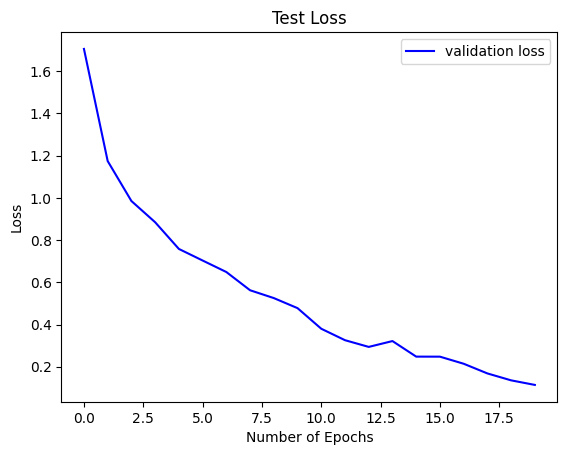

In [23]:
# evaluate loss
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
# weather code mapping function for data testing
def weatherTest(i):
    if (i < 20):
        return 0
    elif (i < 40):
        return 1
    elif (i < 60):
        return 2
    elif (i < 80):
        return 3
    elif (i < 100):
        return 4
    elif (i < 120):
        return 5
    elif (i < 140):
        return 6
    else:
        return 7

# mapping for data testing results (y_test)
y_test = np.array([weatherTest(index) for index in range(0, 160)], dtype=int)
y_test.reshape(-1,)
print(y_test.shape)
y_test

(160,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7])

In [25]:
# data image preprocessing
# input testing dataset to numpy array
dew = np.array([resize(np.array(Image.open('./Test/dew/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/dew')], dtype=float)

fogsmog = np.array([resize(np.array(Image.open('./Test/fogsmog/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/fogsmog')], dtype=float)

gabung = np.append(dew, fogsmog,  0)

hail = np.array([resize(np.array(Image.open('./Test/hail/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/hail')], dtype=float)

gabung = np.append(gabung, hail,  0)

lightning = np.array([resize(np.array(Image.open('./Test/lightning/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/lightning')], dtype=float)

gabung = np.append(gabung, lightning,  0)

rain = np.array([resize(np.array(Image.open('./Test/rain/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/rain')], dtype=float)

gabung = np.append(gabung, rain,  0)

rainbow = np.array([resize(np.array(Image.open('./Test/rainbow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/rainbow')], dtype=float)

gabung = np.append(gabung, rainbow,  0)

sandstorm = np.array([resize(np.array(Image.open('./Test/sandstorm/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/sandstorm')], dtype=float)

gabung = np.append(gabung, sandstorm,  0)

snow = np.array([resize(np.array(Image.open('./Test/snow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/snow')], dtype=float)

# X_test result
X_test = np.append(gabung, snow,  0)

# check data testing shape
print(X_test.shape, y_test.shape)

(160, 150, 200, 3) (160,)


In [26]:
# evaluation of accuracy and loss using data test
cnn.evaluate(X_test,y_test)

5/5 [==============================] - 1s 92ms/step - loss: 1.1498 - accuracy: 0.7563


[1.1497828960418701, 0.7562500238418579]

In [ ]:
# data accuracy per type of weather
from sklearn.metrics import classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# data report precision, recall, and f1-score values
print(classification_report(y_test, y_pred_classes))

5/5 [==============================] - 1s 98ms/step
              precision    recall  f1-score   support

           1       1.00      0.85      0.92        20
           2       0.88      0.75      0.81        20
           3       0.71      0.75      0.73        20
           4       0.78      0.90      0.84        20
           5       0.60      0.60      0.60        20
           6       0.94      0.85      0.89        20
           7       0.90      0.90      0.90        20
           8       0.54      0.65      0.59        20

    accuracy                           0.78       160
   macro avg       0.80      0.78      0.79       160
weighted avg       0.80      0.78      0.79       160

